## Imports + install 

In [ ]:
!pip install autogluon

In [ ]:
!pip install mxnet

In [3]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import cv2
import random
import PIL
import torch

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


#### Cuda test

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


## Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Path on drive

In [6]:
path = '/content/drive/My Drive/DOG_VS_CAT'

#### List of images

In [8]:
# On recupere la liste des images du dossier drive

image_list = [x for x in os.listdir(os.path.join(path, 'train')) if x.endswith('jpg')]

In [9]:
# On melange les images si on ne veut prendre qu'un echantillon des donnees
random.shuffle(image_list)

In [10]:
#Fonction pour labeliser les images entre chien et chat

def label_fn(x):
  if (os.path.basename(x).split('.')[0] == 'cat'):
    return 'cat'
  else :
    return 'dog'



In [11]:
new_data = ImageDataset.from_name_func(image_list, label_fn, root=os.path.join(os.getcwd(), path, 'train'))
new_data

image  label
0      /content/drive/My Drive/DOG_VS_CAT/train/dog.1...      0
1      /content/drive/My Drive/DOG_VS_CAT/train/dog.5...      0
2      /content/drive/My Drive/DOG_VS_CAT/train/cat.1...      1
3      /content/drive/My Drive/DOG_VS_CAT/train/dog.3...      0
4      /content/drive/My Drive/DOG_VS_CAT/train/dog.5...      0
...                                                  ...    ...
24995  /content/drive/My Drive/DOG_VS_CAT/train/cat.1...      1
24996  /content/drive/My Drive/DOG_VS_CAT/train/dog.1...      0
24997  /content/drive/My Drive/DOG_VS_CAT/train/cat.8...      1
24998  /content/drive/My Drive/DOG_VS_CAT/train/dog.3...      0
24999  /content/drive/My Drive/DOG_VS_CAT/train/dog.9...      0

[25000 rows x 2 columns]

## Show random pictures

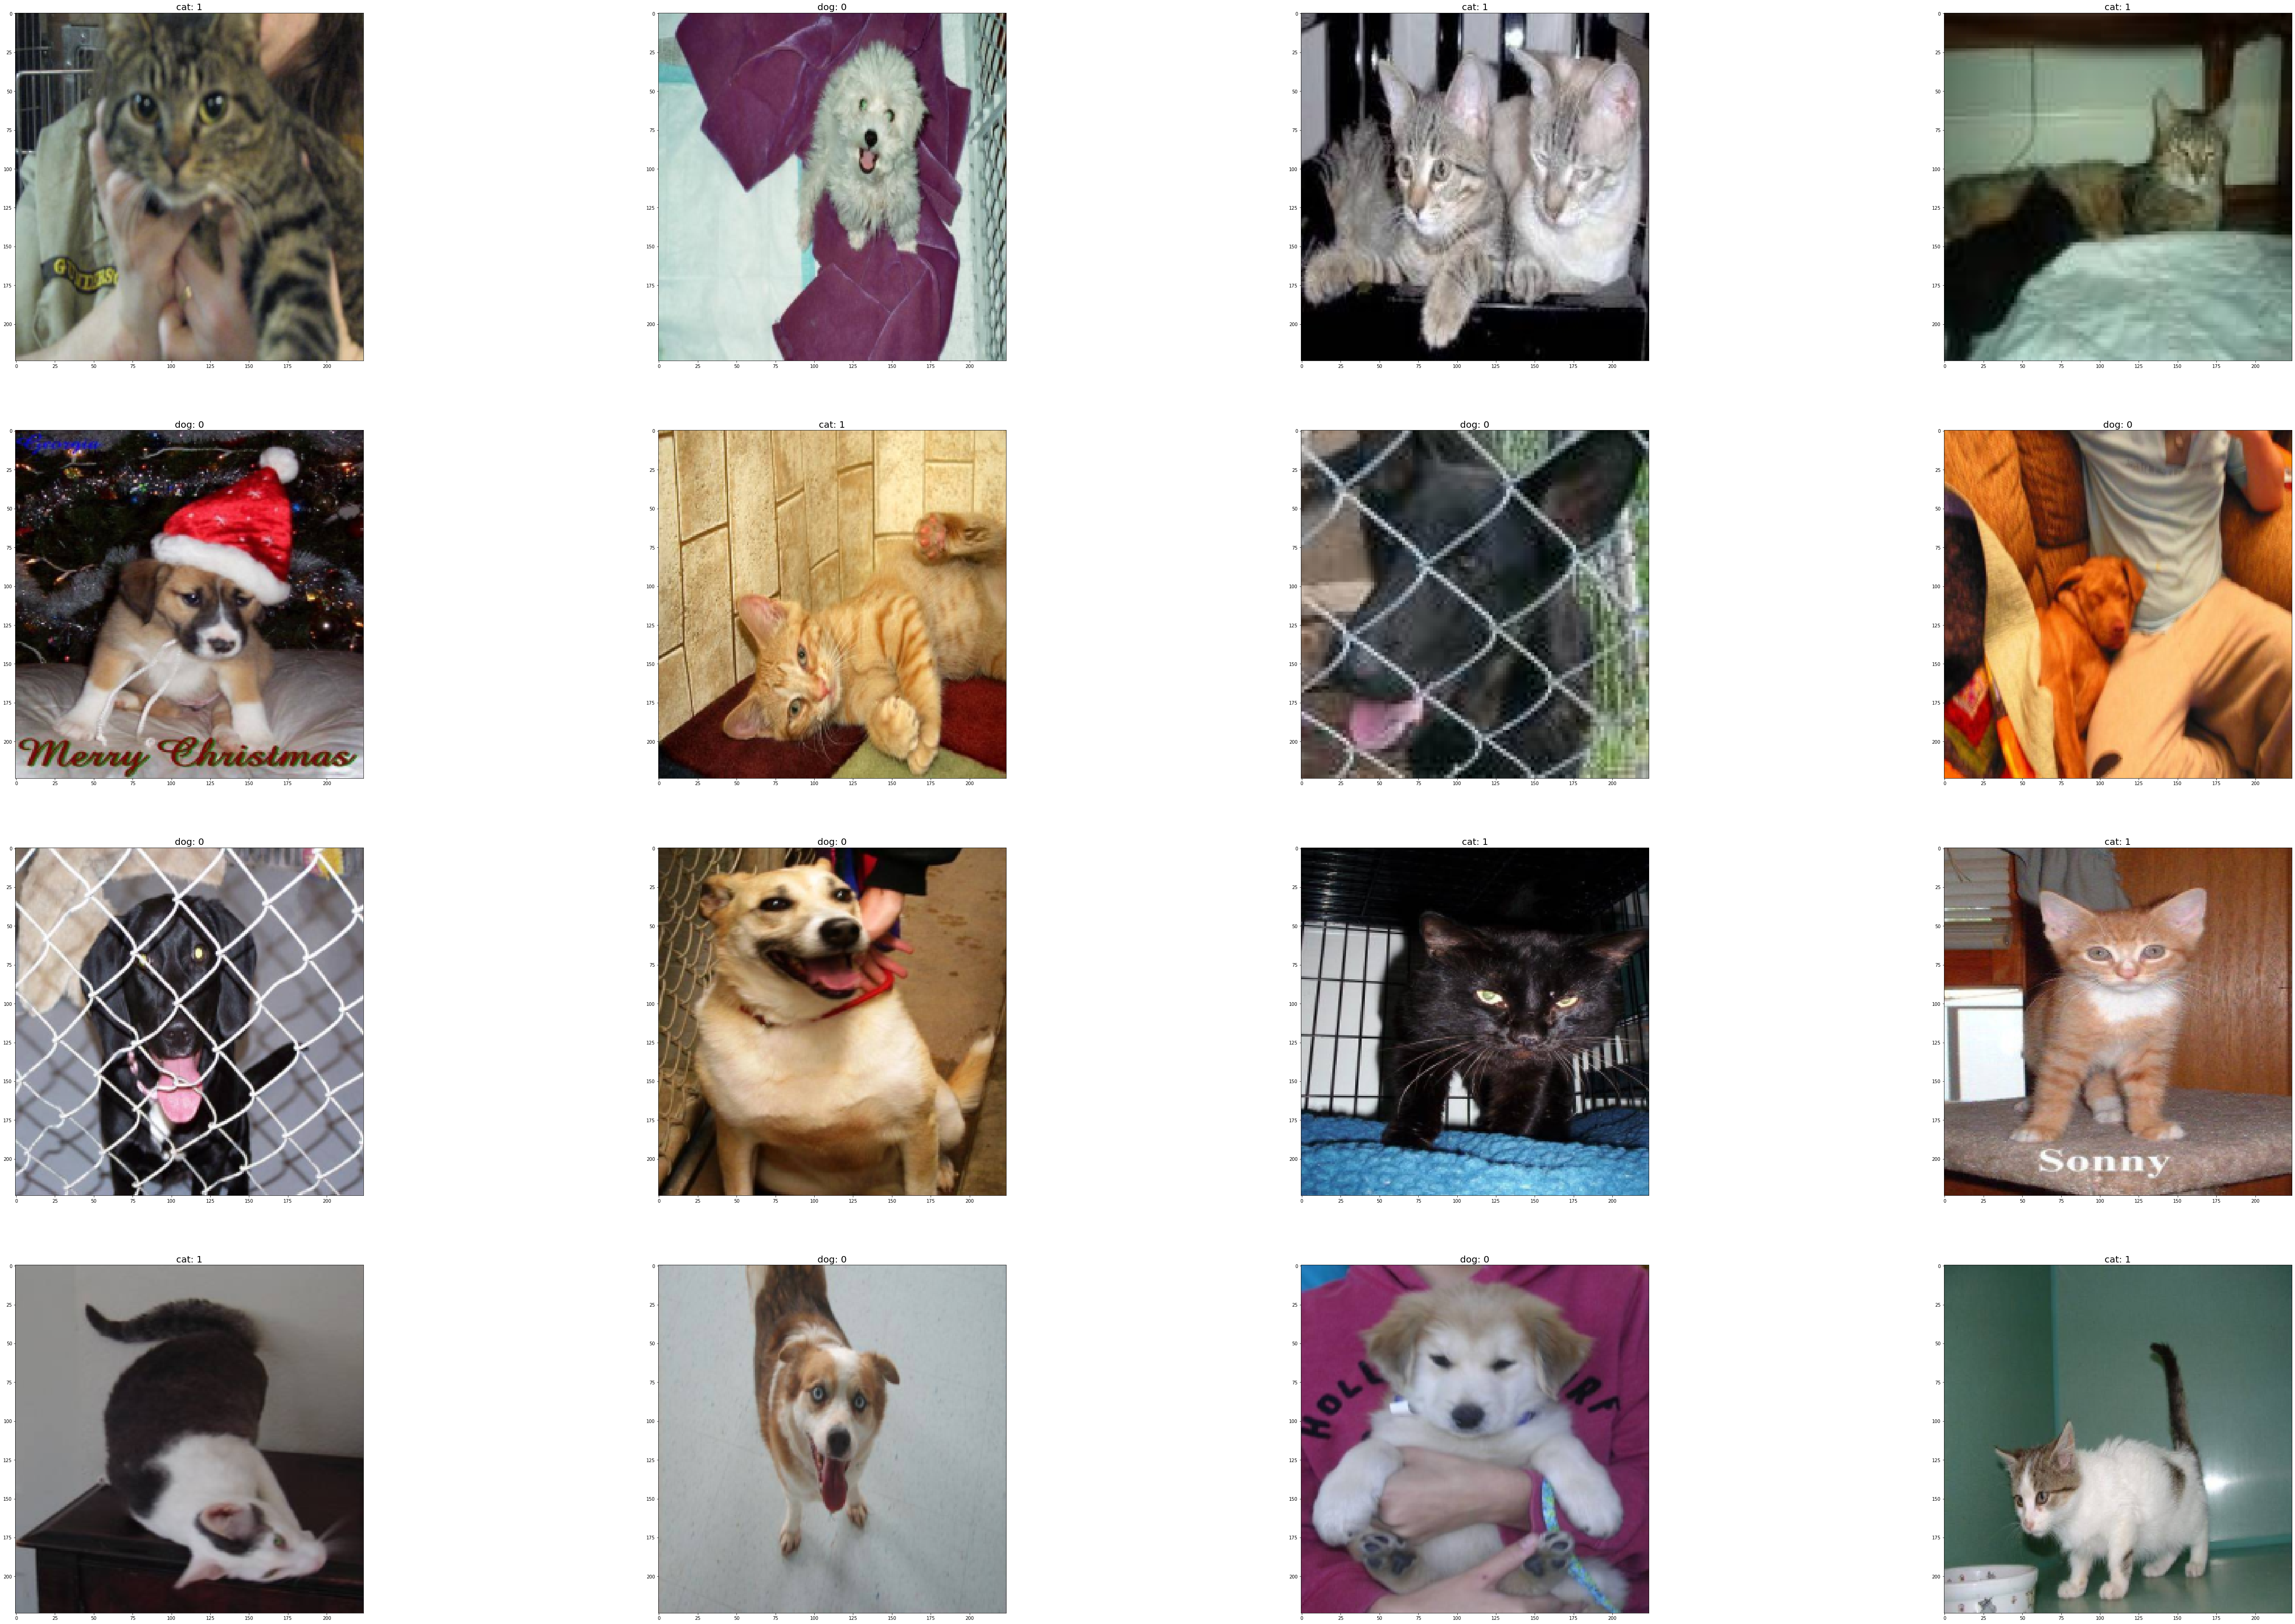

In [12]:
new_data.show_images()

In [13]:
# On ne prend qu'une petite partie des donnees pour nos tests et pour aller  plus vite

train_data = new_data[:5000]

In [14]:
train_data.shape

(5000, 2)

## Save path

In [15]:
save('/content/drive/My Drive/AI_models/')

'' was not found in history, as a file, url, nor in the user namespace.


# Model

In [16]:
# On definit notre modele

## Specify hyperparameters


In [22]:
batch_size = 16
lr = ag.Categorical(1e-2, 1e-3)
epochs = 10

## Fit with autogluon

In [23]:
hyperparameters={
                 'batch_size': batch_size,
                 'lr': lr,
                 'epochs': epochs
                 }
predictor = ImagePredictor()

#The `fit` function splits the train data with a 90/10 ratio for validation
predictor.fit(train_data, 
              time_limit=60*60, 
              hyperparameters=hyperparameters,
              )

ImagePredictor sets accuracy as default eval_metric for classification problems.
Reset labels to [0, 1]
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Randomly split train_data into train[4500]/validation[500] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 32 != 16
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 10
root.img_cls.model   resnet101 != resnet50
root.misc.num_workers 4 != 2
root.misc.seed       42 != 651
}
Saved config to /content/618eed4d/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
Epoch[0] Batch [49]	Speed: 12.295687 samples/sec	accuracy=0.6937

In [24]:
fit_result = predictor.fit_summary()

## Summary results

In [26]:
fit_result

{'best_config': {'batch_size': 16,
  'dist_ip_addrs': None,
  'early_stop_baseline': -inf,
  'early_stop_max_value': inf,
  'early_stop_patience': 10,
  'epochs': 10,
  'final_fit': False,
  'gpus': [0],
  'log_dir': '/content/618eed4d',
  'lr': 0.01,
  'model': 'resnet50',
  'ngpus_per_trial': 8,
  'nthreads_per_trial': 128,
  'num_trials': 1,
  'num_workers': 2,
  'problem_type': 'multiclass',
  'scheduler': 'local',
  'search_strategy': 'random',
  'searcher': 'random',
  'seed': 651,
  'time_limits': 3600,
  'wall_clock_tick': 1637425009.1535726},
 'fit_history': {'best_config': {'batch_size': 16,
   'dist_ip_addrs': None,
   'early_stop_baseline': -inf,
   'early_stop_max_value': inf,
   'early_stop_patience': 10,
   'epochs': 10,
   'final_fit': False,
   'gpus': [0],
   'log_dir': '/content/618eed4d',
   'lr': 0.01,
   'model': 'resnet50',
   'ngpus_per_trial': 8,
   'nthreads_per_trial': 128,
   'num_trials': 1,
   'num_workers': 2,
   'problem_type': 'multiclass',
   'schedule

In [27]:
print('Best train accuracy: %.3f, validation accuracy: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Best train accuracy: 0.954, validation accuracy: 0.996


## Get test pictures

In [28]:
test_filenames = os.listdir('/content/drive/My Drive/DOG_VS_CAT/test')

In [29]:
test_data=pd.DataFrame({
    'filename':test_filenames
})

## Short sample for test data

In [30]:
short_test = test_data[:200]

In [31]:
image_list_test = [x for x in os.listdir(os.path.join(path, 'test')) if x.endswith('jpg')]
test_data = ImageDataset(image_list_test, root=os.path.join(os.getcwd(), path, 'test'))

In [32]:
test_data.columns = ['image']

In [33]:
# NE RUN QUUNE SEULE FOIS

for i in test_data:
  test_data[i] =  '/content/drive/My Drive/DOG_VS_CAT/test/' + test_data[i]

In [34]:
test_data

image
0       /content/drive/My Drive/DOG_VS_CAT/test/9816.jpg
1       /content/drive/My Drive/DOG_VS_CAT/test/9553.jpg
2       /content/drive/My Drive/DOG_VS_CAT/test/9286.jpg
3       /content/drive/My Drive/DOG_VS_CAT/test/9697.jpg
4       /content/drive/My Drive/DOG_VS_CAT/test/9688.jpg
...                                                  ...
12495  /content/drive/My Drive/DOG_VS_CAT/test/10474.jpg
12496  /content/drive/My Drive/DOG_VS_CAT/test/10509.jpg
12497  /content/drive/My Drive/DOG_VS_CAT/test/10415.jpg
12498  /content/drive/My Drive/DOG_VS_CAT/test/10452.jpg
12499  /content/drive/My Drive/DOG_VS_CAT/test/10544.jpg

[12500 rows x 1 columns]

In [35]:
def predict_image(img):
  if (predictor.predict(img)[0] == 1):
    return 'CAT'
  else:
    return 'DOG'

## Prediction on test data (without label)

In [47]:
# Numero de l'image qu'on souhaite predire
# Modifier pour tester
image_number = 10

In [48]:
predict_image(test_data['image'][image_number])

'DOG'

In [49]:
# Probabilities
predictor.predict_proba(test_data['image'][image_number])

0        1
0  0.96116  0.03884

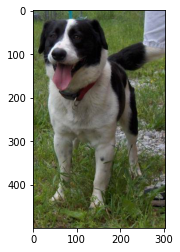

In [50]:
# Read Images
img = mpimg.imread(test_data['image'][image_number])
  
# Output Images
plt.imshow(img)

## Bulk predictions on test data

In [51]:
# On realise notre prediction sur 100 images du jeu de test

bulk_result = predictor.predict(test_data[:100])
print(bulk_result)

0     0
1     1
2     0
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: label, Length: 100, dtype: int64


## Show bulk predictions

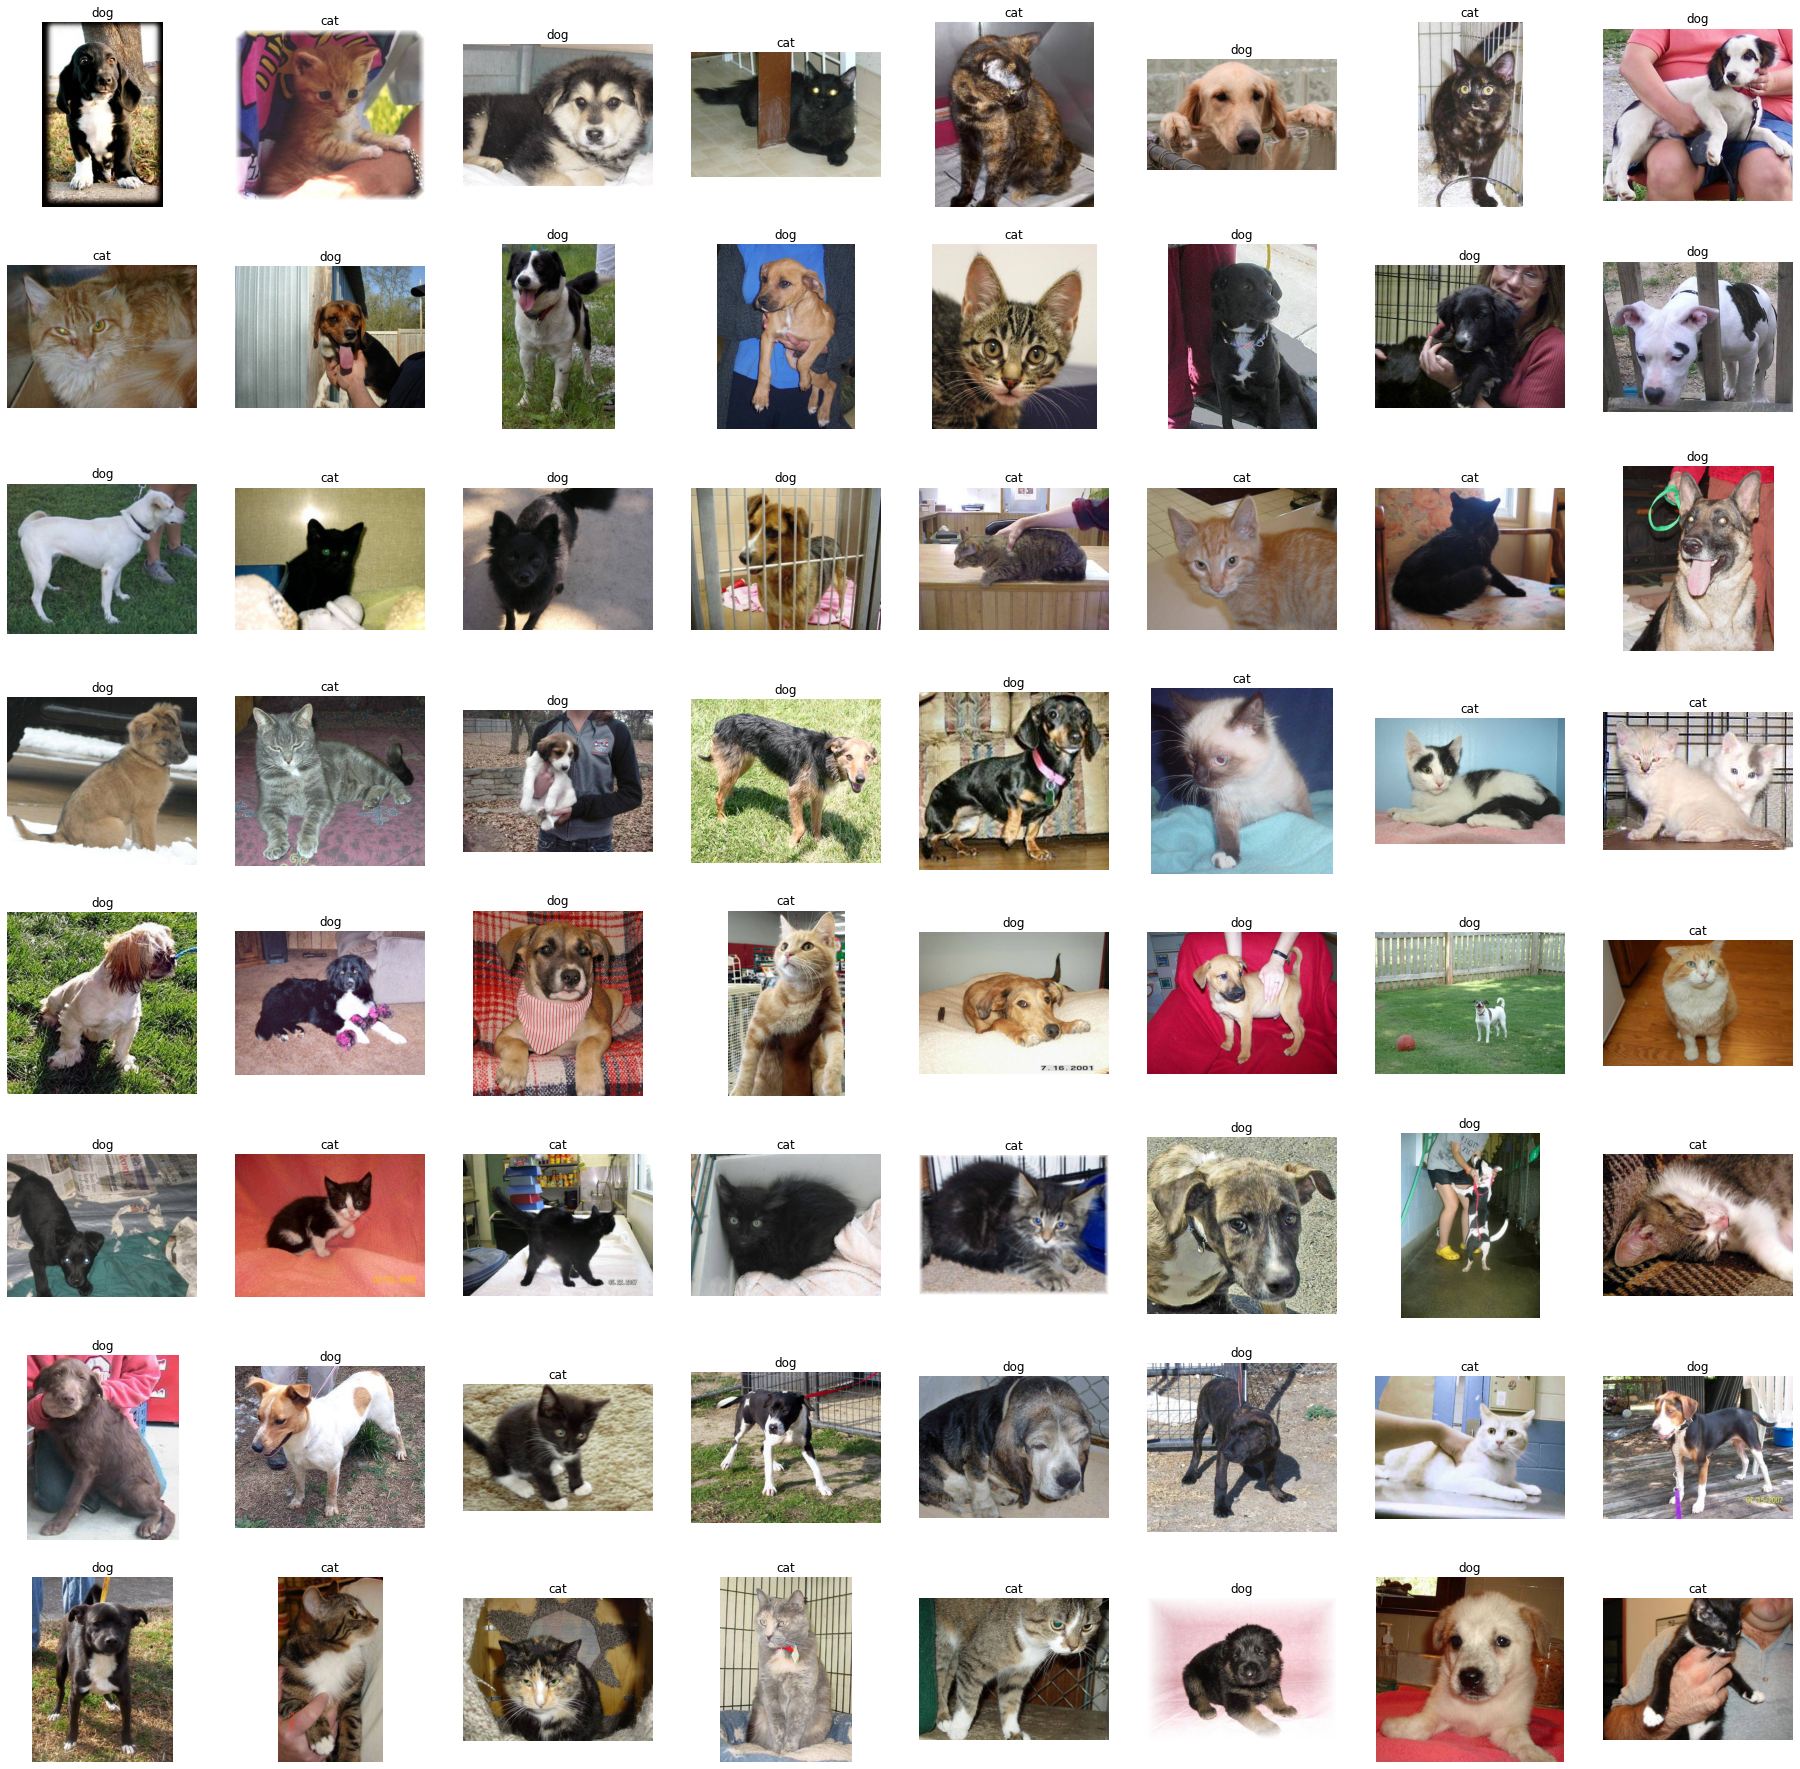

In [52]:
plt.figure(figsize=(32,32))
for i in range (len(test_data['image'][:64])):
  plt.subplot(8,8,i+1)
  plt.imshow(mpimg.imread(test_data['image'][i]))
  plt.title('cat' if bulk_result[i] == 1 else 'dog')
  plt.axis('off')
plt.show()

## Save the model with pickle 

In [53]:
import pickle

In [54]:
pickle.dump( predictor, open('/content/drive/My Drive/AI_models/model.pkl', "wb" ) )

# 2nd training with Bayesian Optimization

In [61]:
train_data2 = new_data[5000:10000]
train_data2.shape

(5000, 2)

In [62]:
batch_size = 32
lr = ag.Categorical(1e-2, 1e-3)

In [64]:
hyperparameters={
                 'batch_size': batch_size,
                 'lr': lr,
                 'epochs': 10
                 }
predictor = ImagePredictor()

#The `fit` function splits the train data with a 90/10 ratio for validation
predictor.fit(train_data2, 
              time_limit=60*60, 
              hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs={'searcher': 'bayesopt', 'lr_choice': 0}
              )

ImagePredictor sets accuracy as default eval_metric for classification problems.
Reset labels to [0, 1]
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Randomly split train_data into train[4500]/validation[500] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 10
root.img_cls.model   resnet101 != resnet50
root.misc.num_workers 4 != 2
root.misc.seed       42 != 544
}
Saved config to /content/a219d5f3/.trial_0/config.yaml
Model resnet50 created, param count:                                         23512130
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
Epoch[0] Batch [49]	Speed: 47.087637 samples/sec	accuracy=0.631250	lr=0.000100
Epoch[0] Batch [

In [65]:
fit_result2 = predictor.fit_summary()

In [66]:
print('Best train accuracy: %.3f, validation accuracy: %.3f' %(fit_result2['train_acc'], fit_result2['valid_acc']))

Best train accuracy: 0.958, validation accuracy: 0.990


# Last test with specific model

In [69]:
train_data4 = new_data[20000:25000]
model = ag.Categorical('resnet18_v1b', 'mobilenetv3_small')  #models from mxnet library

In [70]:
predictor = ImagePredictor()
hyperparameters2 = {
    'model': 'resnet50d',
    'lr': 0.01, 
    'batch_size': 32,
    'epochs': 5,
    'early_stop_patience': 5 
}

predictor.fit(train_data4, 
              time_limit=60*60, 
              hyperparameters=hyperparameters2,
              )

ImagePredictor sets accuracy as default eval_metric for classification problems.
Reset labels to [0, 1]
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Randomly split train_data into train[4500]/validation[500] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 5
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 5
root.img_cls.model   resnet101 != resnet50d
root.misc.num_workers 4 != 2
root.misc.seed       42 != 643
}
Saved config to /content/ee327032/.trial_0/config.yaml
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth
Model resnet50d created, param count:                                         23531362
AMP not enabled. Tr

In [71]:
fit_result4 = predictor.fit_summary()
print('Best train accuracy: %.3f, validation accuracy: %.3f' %(fit_result4['train_acc'], fit_result4['valid_acc']))

Best train accuracy: 0.936, validation accuracy: 0.980


## Test load model

In [73]:
model = pickle.load( open( "/content/drive/MyDrive/AI_models/model.pkl", "rb" ))

In [74]:
model.predict(test_data['image'][1])

0    1
Name: label, dtype: int64

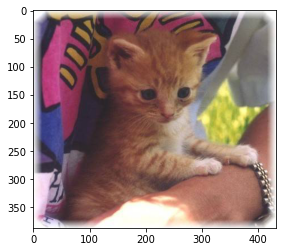

In [75]:
img = mpimg.imread(test_data['image'][1])
plt.imshow(img)